<div align="center">

<h1 style="color:#7B68EE; font-weight:bold; font-family:sans-serif;">
------------------------------------------------------------------------<br>
 ML - Classification Implementation <br>
------------------------------------------------------------------------
</h1>

</div>

##Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix,
    roc_curve, roc_auc_score, auc, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance

#Load and Preprocess Dataset - MNIST dataset

In [2]:
# Load MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize labels for ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

##Helper Functions

In [3]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def compute_metrics(y_true, y_pred, average='macro'):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average)
    rec = recall_score(y_true, y_pred, average=average)
    spec = recall_score(y_true, y_pred, average=average, pos_label=0)  # crude specificity
    return acc, prec, rec, spec

def plot_roc_curves(model, X_test, y_test_bin, title):
    y_score = model.predict_proba(X_test)
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curves: {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

##Train Models and Evaluate

###1. Logistic Regression

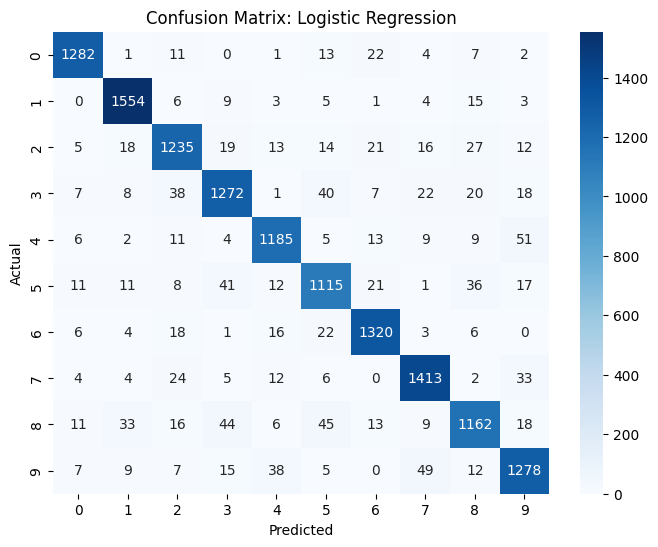


Logistic Regression → Accuracy: 0.915, 
Precision: 0.915, 
Recall: 0.914, 
Specificity: 0.914


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [4]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

plot_conf_matrix(y_test, y_pred_log, "Logistic Regression")
acc, prec, rec, spec = compute_metrics(y_test, y_pred_log)
print(f"\nLogistic Regression → Accuracy: {acc:.3f}, \nPrecision: {prec:.3f}, \nRecall: {rec:.3f}, \nSpecificity: {spec:.3f}")

###2. SVM

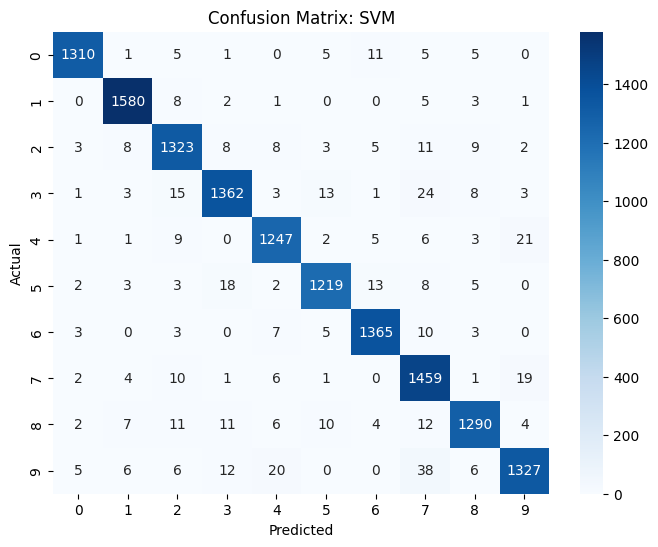


SVM → Accuracy: 0.963, 
Precision: 0.963, 
Recall: 0.963, 
Specificity: 0.963


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [5]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

plot_conf_matrix(y_test, y_pred_svm, "SVM")
acc, prec, rec, spec = compute_metrics(y_test, y_pred_svm)
print(f"\nSVM → Accuracy: {acc:.3f}, \nPrecision: {prec:.3f}, \nRecall: {rec:.3f}, \nSpecificity: {spec:.3f}")

###3. Decision Tree

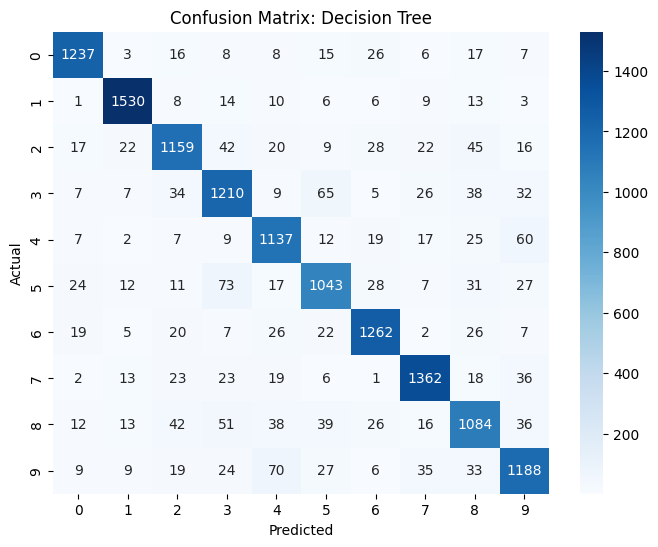


Decision Tree → 
Accuracy: 0.872, 
Precision: 0.871, 
Recall: 0.870, 
Specificity: 0.870


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [6]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

plot_conf_matrix(y_test, y_pred_tree, "Decision Tree")
acc, prec, rec, spec = compute_metrics(y_test, y_pred_tree)
print(f"\nDecision Tree → \nAccuracy: {acc:.3f}, \nPrecision: {prec:.3f}, \nRecall: {rec:.3f}, \nSpecificity: {spec:.3f}")

###4. Random Forest

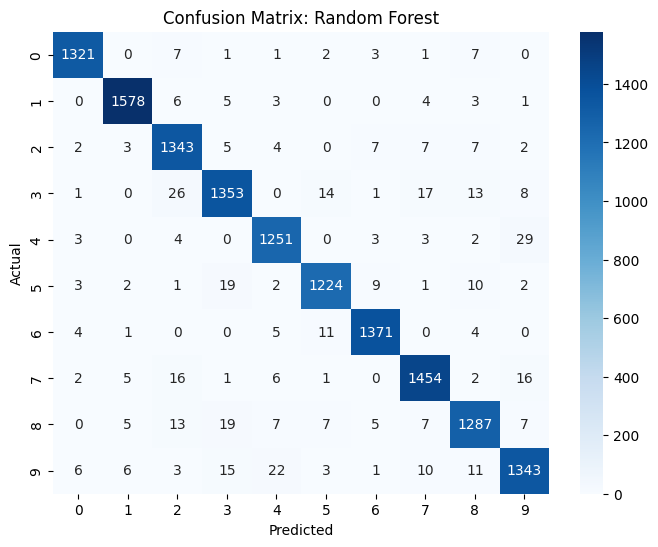


Random Forest → 
Accuracy: 0.966, 
Precision: 0.966, 
Recall: 0.966, 
Specificity: 0.966


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [7]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

plot_conf_matrix(y_test, y_pred_forest, "Random Forest")
acc, prec, rec, spec = compute_metrics(y_test, y_pred_forest)
print(f"\nRandom Forest → \nAccuracy: {acc:.3f}, \nPrecision: {prec:.3f}, \nRecall: {rec:.3f}, \nSpecificity: {spec:.3f}")

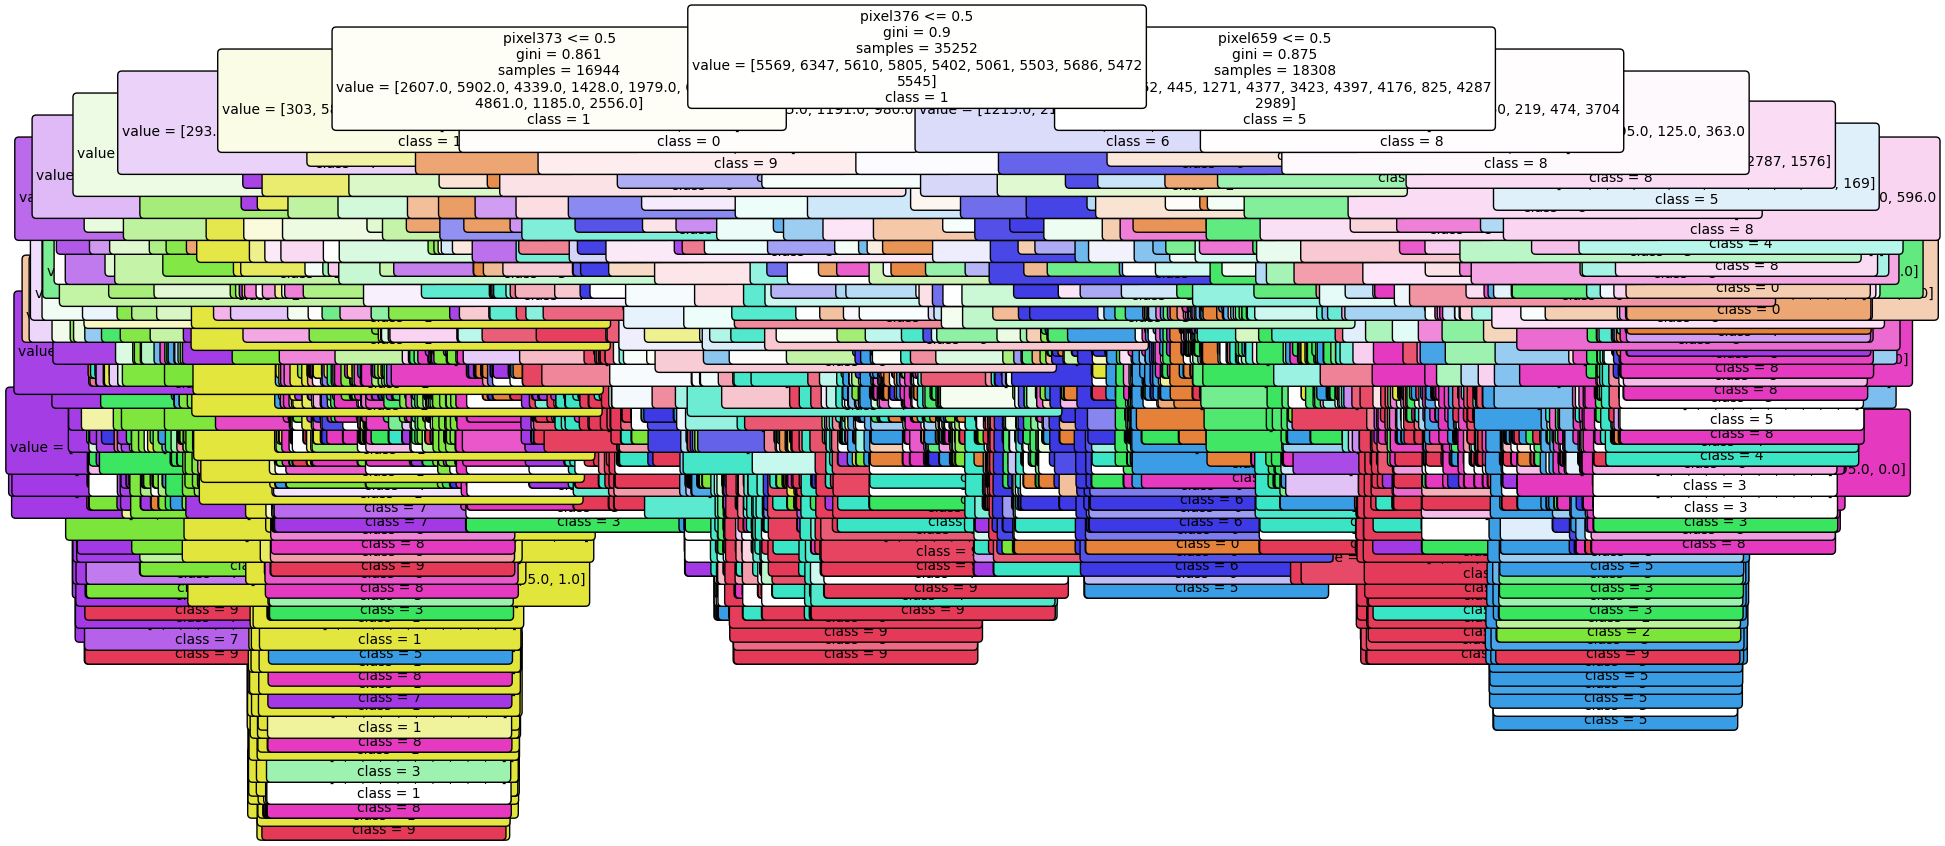

In [10]:
from sklearn.tree import plot_tree

# Fit a Random Forest (if not already done)
# Select the first tree from the trained Random Forest
estimator = forest.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=[f'pixel{i}' for i in range(1, 785)],  # Feature names for each pixel
          class_names=[str(i) for i in range(10)],  # Class names for digits 0-9
          filled=True, rounded=True, fontsize=10)
plt.show()


###5. K-NN

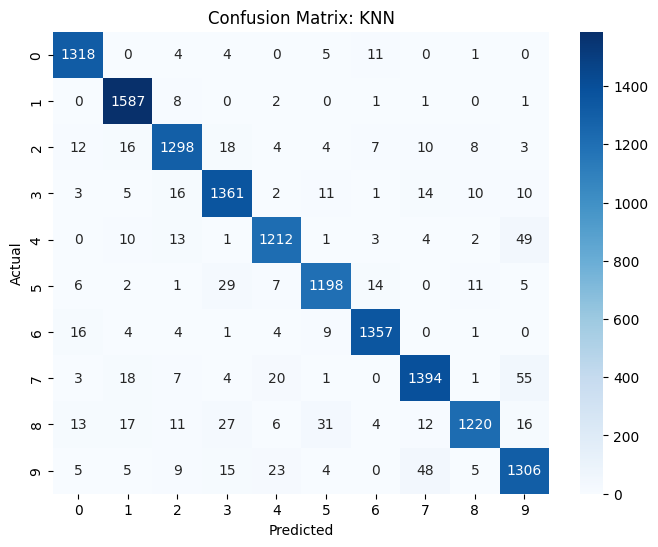

KNN → Accuracy: 0.947, Precision: 0.947, Recall: 0.946, Specificity: 0.946


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

plot_conf_matrix(y_test, y_pred_knn, "KNN")
acc, prec, rec, spec = compute_metrics(y_test, y_pred_knn)
print(f"KNN → Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, Specificity: {spec:.3f}")

###6. XGBoost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:58:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


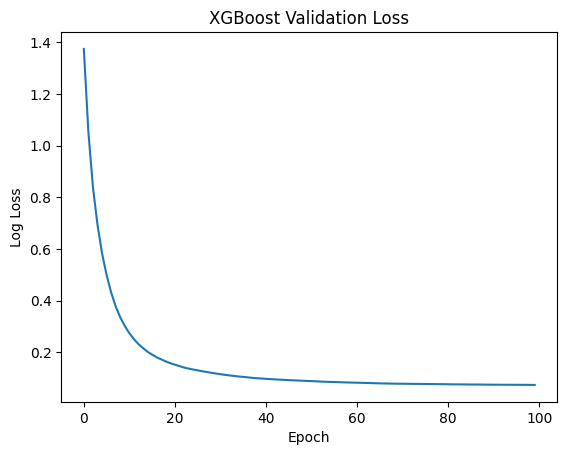

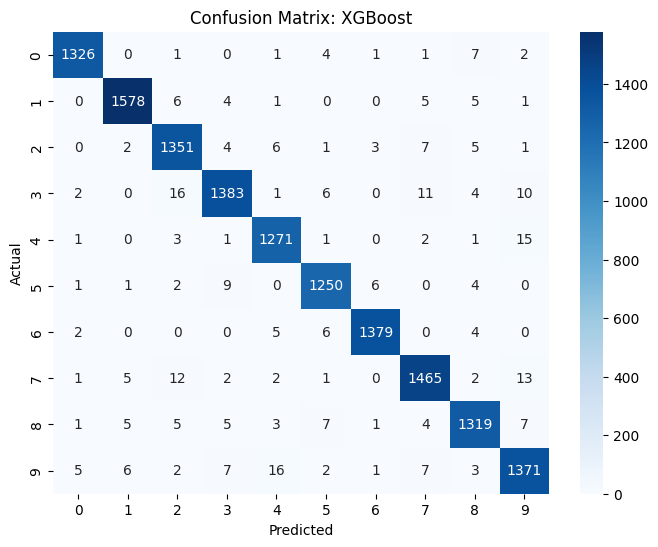

XGBoost → Accuracy: 0.978, 
Precision: 0.978, 
Recall: 0.978, 
Specificity: 0.978


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [13]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], verbose=False)
y_pred_xgb = xgb.predict(X_test_scaled)

# Loss curve
results = xgb.evals_result()
plt.plot(results['validation_0']['mlogloss'])
plt.title("XGBoost Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.show()

plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")
acc, prec, rec, spec = compute_metrics(y_test, y_pred_xgb)
print(f"XGBoost → Accuracy: {acc:.3f}, \nPrecision: {prec:.3f}, \nRecall: {rec:.3f}, \nSpecificity: {spec:.3f}")

#plot_roc_curves(xgb, X_test_scaled, y_test_bin, "XGBoost")

###Plot Model Performance

####Collect Metrics

In [14]:
# Store metrics in a dictionary
metrics = {
    "Logistic Regression": compute_metrics(y_test, y_pred_log),
    "SVM": compute_metrics(y_test, y_pred_svm),
    "Decision Tree": compute_metrics(y_test, y_pred_tree),
    "Random Forest": compute_metrics(y_test, y_pred_forest),
    "KNN": compute_metrics(y_test, y_pred_knn),
    "XGBoost": compute_metrics(y_test, y_pred_xgb)
}

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1618: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a 

####Plot Grouped Bar Chart



---



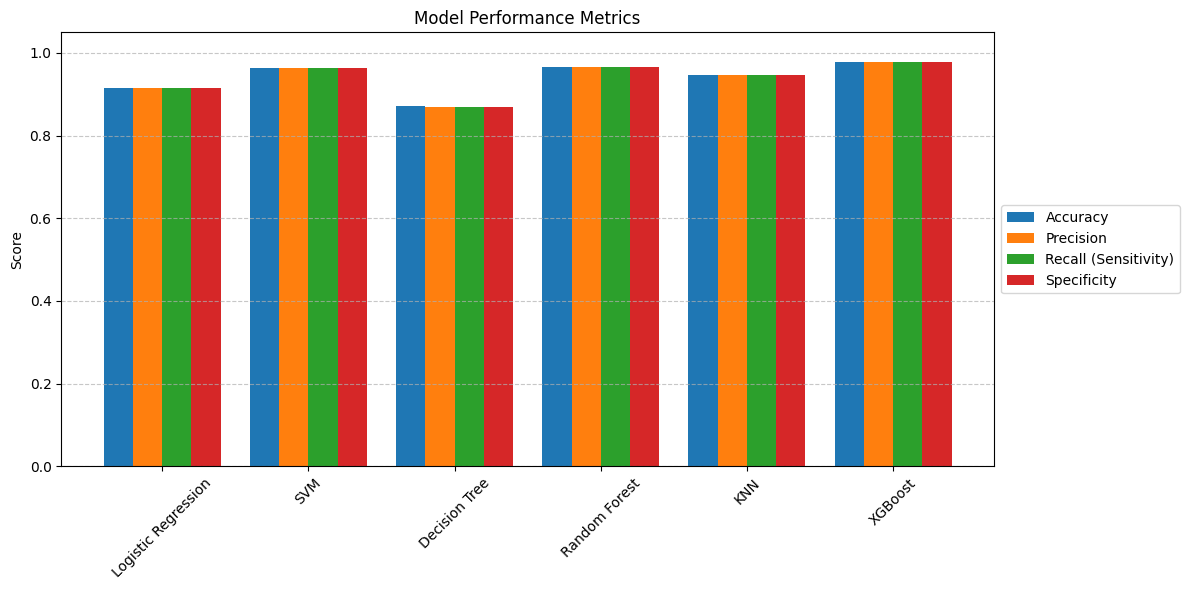

In [17]:
# Prepare data
models = list(metrics.keys())
accuracy = [metrics[m][0] for m in models]
precision = [metrics[m][1] for m in models]
recall = [metrics[m][2] for m in models]
specificity = [metrics[m][3] for m in models]

x = np.arange(len(models))
width = 0.2

# Plot
# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall (Sensitivity)')
plt.bar(x + 1.5*width, specificity, width, label='Specificity')

plt.xticks(x, models, rotation=45)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Model Performance Metrics")

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Place legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
